# <span style='font-family:Inter Black'> Signals

## <span style='font-family:Inter'> Theory


Return of a Portfolio in a certain time $t$ is simply defined as the weighted sum of each of its $n$ components return, i.e.

$$
\begin{equation}
\text{R}_p^{(t)} = \sum_{i}^{n} \text{w}_i^{(t)} \text{r}_i^{(t)}\tag{1}
\end{equation}
$$

In a two assets world:

$$
\text{R}_p^{(t)} = \text{w}_1^{(t)} \text{r}_1^{(t)} + \text{w}_2^{(t)} \text{r}_2^{(t)}
$$

Over time, portfolio return will be a vector of returns where each day's return is computed as in $(1)$:

$$
\text{R}_p = \text{w}_1 \text{r}_1 + \text{w}_2 \text{r}_2
$$


Its variance and standard deviation are respectivelyis (dropping the time notation):

$$
\sigma_p^2= \text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{12}\\
\sigma_p^2= \text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{1}\sigma_{2}\rho_{12}
$$

Then

$$
\sigma_p= \sqrt{\text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{12}}\\
\sigma_p= \sqrt{\text{w}_1^{2} \sigma_1^{2} + \text{w}_2^{2} \sigma_2^{2} + 2\text{w}_1\text{w}_2\sigma_{1}\sigma_{2}\rho_{12}}
$$

The time average gorwth rate of a portfolio is:
$$\mu - \frac{\sigma^2}{2} $$    

    
For our portfolio:    
$$\text{R}_p - \frac{\sigma^2_p}{2} $$    
    
    

In [96]:
import sys
import itertools
import numpy as np
import pandas as pd

sys.path.insert(0, r'C:\Users\lucab\PycharmProjects\Warehouse')

from primitive import rebase_at_x
from Viz.charting import generate_ax
from Finance.primitive import BrownianMotion

In [276]:
# FIXED PARAMS
high_mean = 0.05
low_mean = 0.0
sigma = 0.2

# VARIABLE PARAMS
rho_l = np.arange(-1, 1, 0.01) 
w_1 = np.arange(0, 1, 0.01)

In [277]:
params = pd.DataFrame(list(itertools.product(w_1, rho_l)), columns=['w_1', 'rho'])
w1 = params.loc[:, 'w_1']
w2 = 1 - params.loc[:, 'w_1']
rho = params.loc[:, 'rho']

In [278]:
ptf_vol = (sigma**2 * w1**2) + (sigma**2 * w2**2) + 2 * w1 * w2 * (sigma**2) * rho
ptf_ret = (w1 * high_mean) + (w2 * low_mean)  - ptf_vol / 2

In [279]:
params['return'] = ptf_ret
params_pivot = round(params, 5).pivot('w_1', 'rho', 'return')

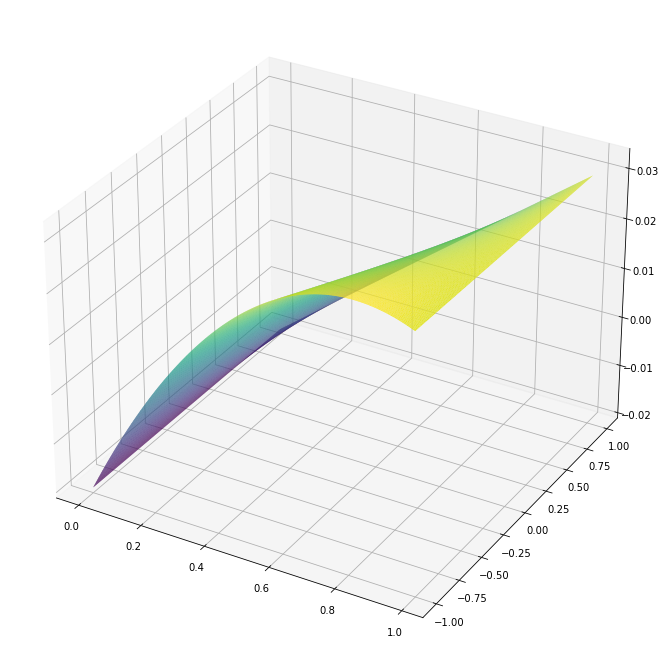

In [280]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(params.loc[:, 'w_1'], params.loc[:, 'rho'], params.loc[:, 'return'], norm=None, vmin=None, vmax=None, lightsource=None, cmap='viridis')
plt.show()

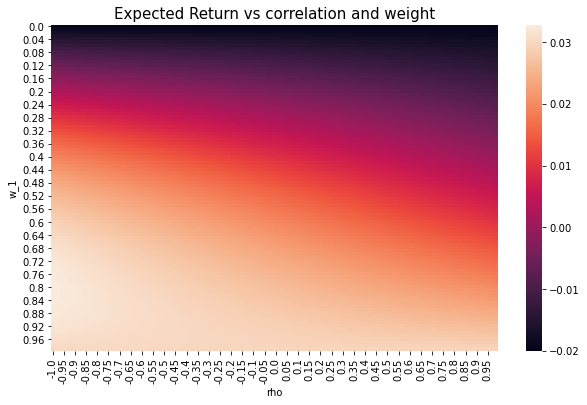

In [281]:
import seaborn as sns
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
params_pivot = round(params, 5).pivot('w_1', 'rho', 'return')
sns.heatmap(params_pivot, ax=ax)
ax.set_title('Expected Return vs correlation and weight', size=15)
plt.show()

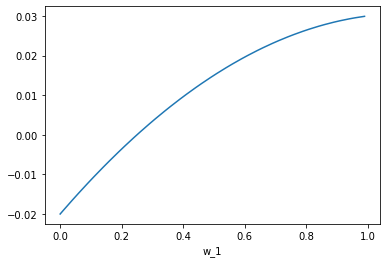

In [282]:
params_pivot.loc[:, 0].plot()
plt.show()

In [216]:
-(low_mean - high_mean - sigma**2)/(2*(sigma**2))

1.125

In [63]:
T = 10000

In [240]:
gbm_high = BrownianMotion(S0=100, mu=high_mean, sigma=sigma, T=T, I=1)
gbm_low = BrownianMotion(S0=100, mu=low_mean, sigma=sigma, T=T, I=1)

In [254]:
gbm = pd.concat([gbm_high, gbm_low], axis=1)
gbm.columns = ['high', 'low']
gbm_ret = gbm.pct_change()
w = 1.2
bmk_ret = gbm_ret.loc[:, 'high'] * w + gbm_ret.loc[:, 'low'] * (1-w)  
bmk = rebase_at_x((bmk_ret.fillna(0) + 1).cumprod())
strat = rebase_at_x((strat_ret.fillna(0) + 1).cumprod())
gbm['benchmark'] = bmk


<AxesSubplot:title={'center':'GBM - High and Low Mean'}, xlabel='time', ylabel='y'>

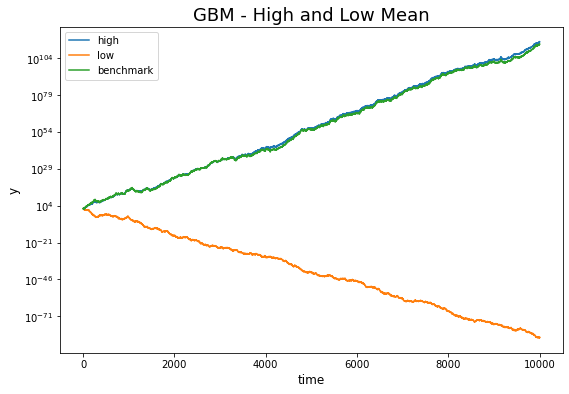

In [255]:
ax = generate_ax('GBM - High and Low Mean', 'time', 'y')
gbm.plot(logy=True, ax=ax)

In [31]:
signal_high = pd.Series(np.random.normal(high_mean, 0.01, T))
signal_low = pd.Series(np.random.normal(low_mean, 0.003, T))

<AxesSubplot:>

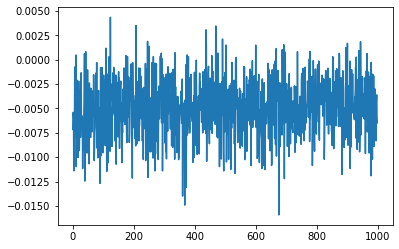

In [32]:
signal_low.plot()